<a href="https://colab.research.google.com/github/rmd-davis/ML-intro/blob/main/03_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Intro to Machine Learning - Regression
Using the The Ames Housing dataset compiled by Dean De Cock.

In this notebook, we will look at how to apply regression and multiple linear regression.

In [1]:
# Import necessary packages

# Pandas to handle the data
import pandas as pd

# Matplotlib and Seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style = 'darkgrid')
sns.set_context('notebook')

# Scipy for linear regression
import scipy

# SciKit-Learn for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Part 1: Linear regression on 2 variables

This is your classic "line of best fit" - you probably did this back in high school.

The equation for a line: **y = mx + b**

It can also be written as: **y = b<sub>0</sub>+b<sub>1</sub>X<sub>1</sub>**

### Load Data

In [2]:
# Load data, but limit it to only two variable2: SalePrice and BedroomAbvGr (total number of bedrooms)

included_columns = ['SalePrice','BedroomAbvGr']

data_2var = pd.read_csv('https://raw.githubusercontent.com/rmd-davis/ML-intro/main/data/housing_data.csv', usecols = included_columns)

### Inspect Data

In [3]:
# Look at the dataframe

data_2var

,BedroomAbvGr,SalePrice
0,3,237000
1,2,194000
2,3,84500
3,2,290000
4,3,153500
...,...,...
2046,3,186500
2047,3,269790
2048,3,156932
2049,3,174900


In [4]:
# Look at basic statistics for the dataset

data_2var.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BedroomAbvGr,2051.0,2.853242,0.838938,0.0,2.0,3.0,3.0,8.0
SalePrice,2051.0,180552.846904,79864.169177,12789.0,129650.0,160000.0,214000.0,745000.0


### Plot Data

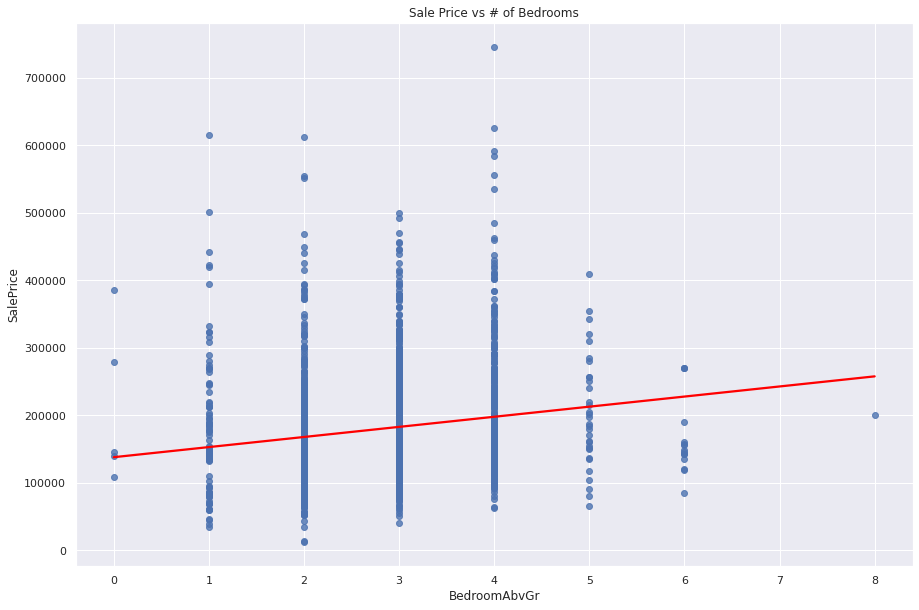

In [5]:
# Plot the data using a 'regplot', which will show a scatterplot of the data points and an estimated line of best fit

fig, ax = plt.subplots(figsize = (15,10))

sns.regplot(data = data_2var, x = 'BedroomAbvGr', y = 'SalePrice', ci=None, line_kws={"color": "red"}).set(title = 'Sale Price vs # of Bedrooms');

### Calculate line of best fit

In [6]:
# Estimate a line of best fit using the Scipy library
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x = data_2var['BedroomAbvGr'], y = data_2var['SalePrice'])

print('Line of best fit in the form y = mx + b')
print(f'y = {slope:.2f}x + {intercept:.2f}')

r_squared = r_value**2

print(f'R-squared: {r_squared:.4f}')
print('\nThis can easily be verified in Excel')

Line of best fit in the form y = mx + b
y = 14970.16x + 137839.37
R-squared: 0.0247

This can easily be verified in Excel


### Create model for line of best fit using SciKit-Learn

In [7]:
# Create 'Machine Learning' model for line of best fit using SciKit-Learn

# Let X represent your features
X = data_2var['BedroomAbvGr'].values.reshape(-1, 1)    #.values.reshape(-1, 1) needed since we only have one variable

# Let y represent the target variable
y = data_2var['SalePrice']

# Train the model
reg = LinearRegression().fit(X,y)

# Print the results
def print_model_results():
    print(f'Coefficients: {reg.coef_}')
    print(f'Intercept: {reg.intercept_}')

    # Calculate R^2 score and mean squared error for ML model
    y_pred = reg.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y,y_pred, squared=False)

    print(f'R^2 score of ML model: {r2:.4f}')
    print(f'RMSE error of ML model: {rmse:.4f}')


print_model_results()


Coefficients: [14970.15567903]
Intercept: 137839.36517128075
R^2 score of ML model: 0.0247
RMSE error of ML model: 78851.2724


## Part 2: Regression on 3 variables  - Multiple Linear Regression

For multiple linear regression, the function you are trying to create is the same as the function for a line, but now it has more variables and coefficients.
<br>The function can be written as: **y = b<sub>0</sub>+b<sub>1</sub>X<sub>1</sub>+b<sub>2</sub>X<sub>2</sub>+ ... + b<sub>n</sub>X<sub>n</sub>**

### Load Data

In [8]:
# Now we will include GrLivArea (house size in square feet)
included_columns = ['SalePrice','BedroomAbvGr','GrLivArea']

data_3var = pd.read_csv('https://raw.githubusercontent.com/rmd-davis/ML-intro/main/data/housing_data.csv', usecols = included_columns)

### Inspect Data

In [9]:
# Look at the dataframe

data_3var

,GrLivArea,BedroomAbvGr,SalePrice
0,2031,3,237000
1,1352,2,194000
2,1140,3,84500
3,1419,2,290000
4,1074,3,153500
...,...,...,...
2046,1792,3,186500
2047,2013,3,269790
2048,1412,3,156932
2049,1165,3,174900


In [10]:
# Look at basic statistics for the dataset

data_3var.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GrLivArea,2051.0,1498.959532,495.802594,334.0,1126.0,1442.0,1747.5,4476.0
BedroomAbvGr,2051.0,2.853242,0.838938,0.0,2.0,3.0,3.0,8.0
SalePrice,2051.0,180552.846904,79864.169177,12789.0,129650.0,160000.0,214000.0,745000.0


### Plot Data

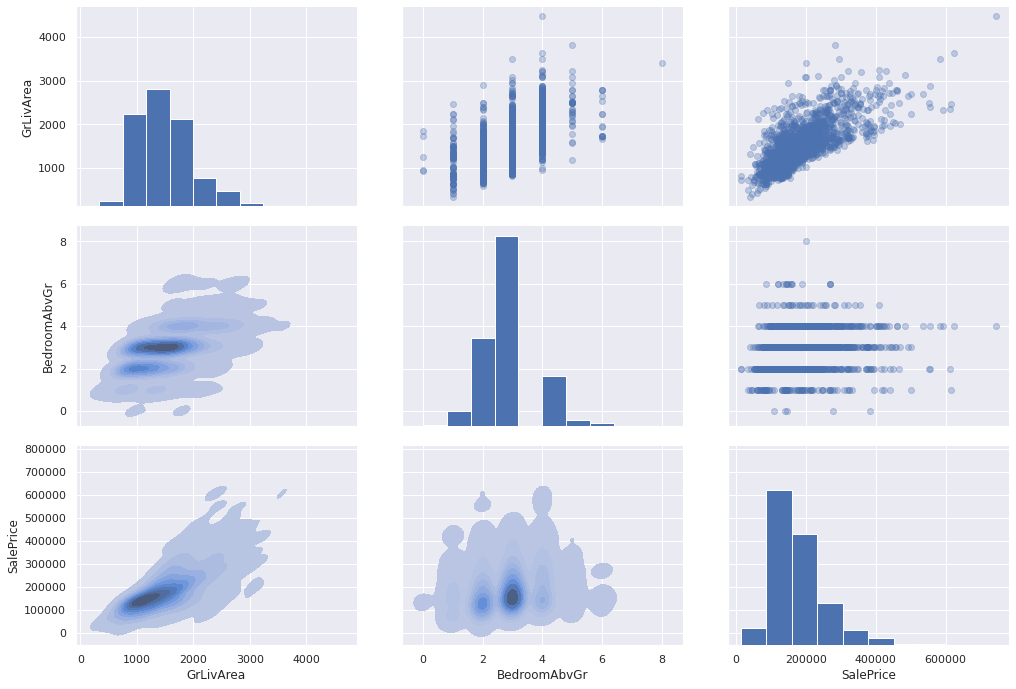

In [11]:
# Use a pair grid to see how different variables interact with each other

g = sns.PairGrid(data_3var)
g.map_diag(plt.hist)
g.map_upper(plt.scatter, alpha=0.3)
g.map_lower(sns.kdeplot,fill=True, thresh = 0.01)
g.fig.set_size_inches(15,10)

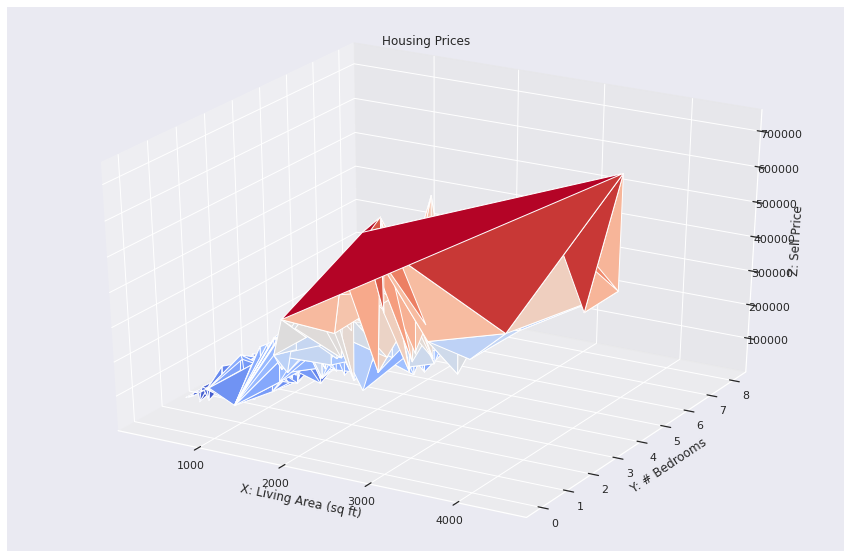

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (15,10))

X = data_3var['GrLivArea']
Y = data_3var['BedroomAbvGr']
Z = data_3var['SalePrice']

surf = ax.plot_trisurf(X,Y,Z, cmap = plt.cm.coolwarm, linewidth = 1, antialiased = True)

ax.set_xlabel('X: Living Area (sq ft)')
ax.set_ylabel('Y: # Bedrooms')
ax.set_zlabel('Z: Sell Price')

ax.set_title('Housing Prices');


### Create model


... BUT scipy does not support multivariable regression 🤔


So, we will just use SciKit-Learn's Linear Regression

In [13]:
# Create 'Machine Learning' model using SciKit-Learn

# Let X represent your features
X = data_3var[['BedroomAbvGr','GrLivArea']]    #.values.reshape(-1, 1) needed since we only have one variable

# Let y represent the target variable
y = data_3var['SalePrice']

reg = LinearRegression().fit(X,y)

print_model_results()

Coefficients: [-32781.51741878    147.53122951]
Intercept: 52943.11701686877
R^2 score of ML model: 0.6120
RMSE error of ML model: 49737.4996


## Part 3: What about 4 variables?

In [14]:
# Now we'll include OverallQual (the overall quality of the house)

included_columns = ['SalePrice','BedroomAbvGr','GrLivArea','OverallQual']

data_4var = pd.read_csv('https://raw.githubusercontent.com/rmd-davis/ML-intro/main/data/housing_data.csv', usecols = included_columns)

# Create 'Machine Learning' model using SciKit-Learn

# Let X represent your features
X = data_4var[['BedroomAbvGr','GrLivArea','OverallQual']]    #.values.reshape(-1, 1) needed since we only have one variable

# Let y represent the target variable
y = data_4var['SalePrice']

reg = LinearRegression().fit(X,y)

print_model_results()

Coefficients: [-16737.80154315     85.36449006  29190.31225375]
Intercept: -77365.97334471371
R^2 score of ML model: 0.7715
RMSE error of ML model: 38163.8610


## Now we're ready to throw all the variables in!
As you can see, the R^2 value is increasing as we add more variables, and the RMSE of the model is decreasing - this means that we are getting better and better at predicting the correct house price as we add more variables.

If we add every column in the dataset, we would have 81 input variables 🤯
<br>It's the same process as above, but now we need to think about data cleaning, feature selection, and feature engineering. More about that another time...